# Importing needed libraries

In [ ]:
from __future__ import print_function
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

import tensorflow as tf

from datetime import datetime
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, make_circles
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import *
from tensorflow.keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, KFold
import keras.backend as K
from keras.wrappers.scikit_learn import KerasClassifier

# Utility functions

In [ ]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

# Main section

In [ ]:
from keras.datasets import fashion_mnist


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Training data shape: ", x_train.shape) # (60000, 28, 28) -- 60000 images, each 28X28 pixels
print("Test data shape", x_test.shape) # (10000, 28, 28) -- 10000 images, each 28x28
print("Training response shape:, ", y_train.shape)
print("Testing response shape: ", y_test.shape)

image_size = (x_train.shape[1], x_train.shape[2])

Training data shape:  (60000, 28, 28)
Test data shape (10000, 28, 28)
Training response shape:,  (60000,)
Testing response shape:  (10000,)


In [ ]:
# Flatten the images
image_vector_size = image_size[0] * image_size[1]
x_train = x_train.reshape(x_train.shape[0], image_vector_size) /255.
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.
print(x_train.shape)

(60000, 784)


In [ ]:
print("First 5 training labels: ", y_train[:5]) # [5, 0, 4, 1, 9]

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])
print(y_train.shape)

First 5 training labels:  [9 0 0 3 0]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(60000, 10)


In [ ]:
def build_dropout_model():
  model = Sequential()

  # The input layer requires the special input_shape parameter which should match
  # the shape of our training data.
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dropout(0.2))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model

def build_deeper_model():
  model = Sequential()
  model.add(Dense(units=64, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=32, activation='sigmoid'))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model



In [ ]:
opt_dict = {'nadam':tf.keras.optimizers.Nadam,
            'adam':tf.keras.optimizers.Adam,
            'sgd':tf.keras.optimizers.SGD,
            'rmsprop':tf.keras.optimizers.RMSprop,
            'adadelta':tf.keras.optimizers.Adadelta,
            'adagrad':tf.keras.optimizers.Adagrad}

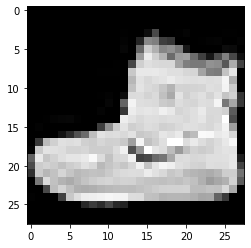

In [ ]:
# load data
(x_train1, y_train1), (x_test1, y_test1) = tf.keras.datasets.fashion_mnist.load_data()

x_train1[0].shape
plt.imshow(x_train1[0], cmap='gray')

In [ ]:

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
#Model 1

model1 = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28,28)),
    layers.Flatten(),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

model1.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                25120     
                                                                 
 dense_20 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer= tf.keras.optimizers.SGD(learning_rate = .0001), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, batch_size=16, epochs=5, verbose=True, validation_split=.1)


Epoch 1/5
3375/3375 [==============================] - 7s 2ms/step - loss: 2.4120 - accuracy: 0.0865 - val_loss: 2.3280 - val_accuracy: 0.1035
Epoch 2/5
3375/3375 [==============================] - 6s 2ms/step - loss: 2.2626 - accuracy: 0.1143 - val_loss: 2.2103 - val_accuracy: 0.1358
Epoch 3/5
3375/3375 [==============================] - 6s 2ms/step - loss: 2.1661 - accuracy: 0.1862 - val_loss: 2.1275 - val_accuracy: 0.2593
Epoch 4/5
3375/3375 [==============================] - 6s 2ms/step - loss: 2.0928 - accuracy: 0.3338 - val_loss: 2.0600 - val_accuracy: 0.4015
Epoch 5/5
3375/3375 [==============================] - 6s 2ms/step - loss: 2.0303 - accuracy: 0.4315 - val_loss: 2.0004 - val_accuracy: 0.4667


Test loss: 2.0
Test accuracy: 0.459


<Figure size 576x432 with 0 Axes>

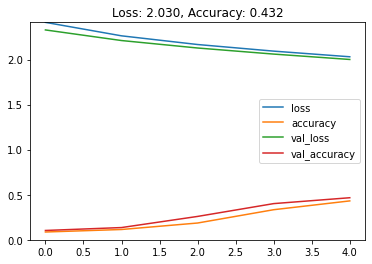

In [ ]:
plot_loss_accuracy(history1)
loss, accuracy  = model1.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Model 2

model2 = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28,28,1)),
    layers.Conv2D(16, kernel_size=3, activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

model2.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_21 (Dense)            (None, 32)                401440    
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 401,930
Trainable params: 401,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer= tf.keras.optimizers.SGD(learning_rate = .0001), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size=16, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
3375/3375 [==============================] - 33s 10ms/step - loss: 2.3016 - accuracy: 0.1205 - val_loss: 2.2396 - val_accuracy: 0.1707
Epoch 2/5
3375/3375 [==============================] - 30s 9ms/step - loss: 2.1727 - accuracy: 0.3389 - val_loss: 2.1084 - val_accuracy: 0.4443
Epoch 3/5
3375/3375 [==============================] - 32s 10ms/step - loss: 2.0342 - accuracy: 0.4952 - val_loss: 1.9553 - val_accuracy: 0.5278
Epoch 4/5
3375/3375 [==============================] - 34s 10ms/step - loss: 1.8729 - accuracy: 0.5330 - val_loss: 1.7881 - val_accuracy: 0.5507
Epoch 5/5
3375/3375 [==============================] - 36s 11ms/step - loss: 1.7135 - accuracy: 0.5506 - val_loss: 1.6388 - val_accuracy: 0.5748


Test loss: 1.65
Test accuracy: 0.559


<Figure size 576x432 with 0 Axes>

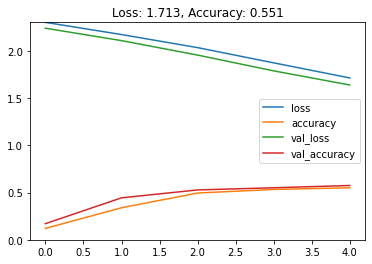

In [ ]:
plot_loss_accuracy(history2)
loss, accuracy  = model2.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Model 3

model3 = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28,28,1)),
    layers.Conv2D(16, kernel_size=5, activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(10, activation="softmax")
])

model3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_23 (Dense)            (None, 32)                401440    
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 402,186
Trainable params: 402,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate = .0001), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.3380 - accuracy: 0.8852 - val_loss: 0.3485 - val_accuracy: 0.8770
Epoch 2/10
3375/3375 [==============================] - 47s 14ms/step - loss: 0.3204 - accuracy: 0.8908 - val_loss: 0.3323 - val_accuracy: 0.8783
Epoch 3/10
3375/3375 [==============================] - 47s 14ms/step - loss: 0.3050 - accuracy: 0.8938 - val_loss: 0.3219 - val_accuracy: 0.8815
Epoch 4/10
3375/3375 [==============================] - 47s 14ms/step - loss: 0.2916 - accuracy: 0.8985 - val_loss: 0.3200 - val_accuracy: 0.8830
Epoch 5/10
3375/3375 [==============================] - 48s 14ms/step - loss: 0.2793 - accuracy: 0.9029 - val_loss: 0.3083 - val_accuracy: 0.8838
Epoch 6/10
3375/3375 [==============================] - 47s 14ms/step - loss: 0.2684 - accuracy: 0.9064 - val_loss: 0.3012 - val_accuracy: 0.8873
Epoch 7/10
3375/3375 [==============================] - 47s 14ms/step - loss: 0.2589 - accuracy: 0.9097 - val_loss: 0.2909 -

Test loss: 0.299
Test accuracy: 0.893


<Figure size 576x432 with 0 Axes>

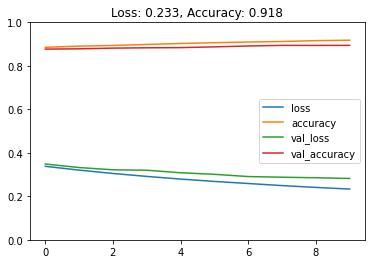

In [ ]:
plot_loss_accuracy(history3)
loss, accuracy  = model3.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Model 4

model4 = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28,28,1)),
    layers.Conv2D(16, kernel_size=5, activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        416       
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                                 
 dense_25 (Dense)            (None, 32)                401440    
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 403,242
Trainable params: 403,242
Non-t

In [ ]:
model4.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = .0001), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train, y_train, batch_size=16, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
3375/3375 [==============================] - 41s 12ms/step - loss: 0.8670 - accuracy: 0.7593 - val_loss: 0.5157 - val_accuracy: 0.8287
Epoch 2/5
3375/3375 [==============================] - 42s 12ms/step - loss: 0.4590 - accuracy: 0.8449 - val_loss: 0.4384 - val_accuracy: 0.8425
Epoch 3/5
3375/3375 [==============================] - 40s 12ms/step - loss: 0.3973 - accuracy: 0.8610 - val_loss: 0.4091 - val_accuracy: 0.8517
Epoch 4/5
3375/3375 [==============================] - 40s 12ms/step - loss: 0.3635 - accuracy: 0.8717 - val_loss: 0.3733 - val_accuracy: 0.8675
Epoch 5/5
3375/3375 [==============================] - 40s 12ms/step - loss: 0.3382 - accuracy: 0.8806 - val_loss: 0.3538 - val_accuracy: 0.8715


Test loss: 0.377
Test accuracy: 0.865


<Figure size 576x432 with 0 Axes>

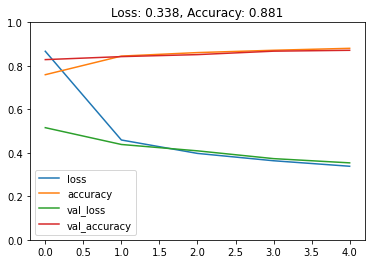

In [ ]:
plot_loss_accuracy(history4)
loss, accuracy  = model4.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Model 5

model5 = Sequential([
    layers.Rescaling(scale=1./255, input_shape=(28,28,1)),
    layers.Conv2D(16, kernel_size=5, activation='relu', padding='valid'),
    layers.Flatten(),
    layers.Dense(32, activation="sigmoid"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_34 (Dense)            (None, 32)                294944    
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 10)                330       
                                                                 
Total params: 296,746
Trainable params: 296,746
Non-t

In [ ]:
model5.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate = .0001), 
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
history5 = model5.fit(x_train, y_train, batch_size=16, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
3375/3375 [==============================] - 36s 11ms/step - loss: 2.3987 - accuracy: 0.1012 - val_loss: 2.3693 - val_accuracy: 0.1030
Epoch 2/5
3375/3375 [==============================] - 36s 11ms/step - loss: 2.3551 - accuracy: 0.1429 - val_loss: 2.3280 - val_accuracy: 0.1753
Epoch 3/5
3375/3375 [==============================] - 35s 10ms/step - loss: 2.3167 - accuracy: 0.1837 - val_loss: 2.2919 - val_accuracy: 0.1868
Epoch 4/5
3375/3375 [==============================] - 39s 12ms/step - loss: 2.2831 - accuracy: 0.1824 - val_loss: 2.2604 - val_accuracy: 0.1860
Epoch 5/5
3375/3375 [==============================] - 36s 11ms/step - loss: 2.2539 - accuracy: 0.1979 - val_loss: 2.2332 - val_accuracy: 0.2180


Test loss: 2.24
Test accuracy: 0.214


<Figure size 576x432 with 0 Axes>

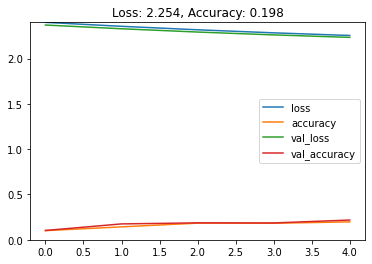

In [ ]:
plot_loss_accuracy(history5)
loss, accuracy  = model5.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Model 6

image_size = 784 
num_classes = 10 
def build_basic_model():
  model = Sequential()

  # The input layer requires the special input_shape parameter which should match
  # the shape of our training data.
  model.add(Dense(units=32, activation='sigmoid', input_shape=(image_vector_size,)))
  model.add(Dense(units=num_classes, activation='softmax'))
  return model
model = build_basic_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=True, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

Epoch 1/5
422/422 [==============================] - 2s 3ms/step - loss: 2.0292 - accuracy: 0.4783 - val_loss: 1.7589 - val_accuracy: 0.6388
Epoch 2/5
422/422 [==============================] - 1s 3ms/step - loss: 1.5804 - accuracy: 0.6353 - val_loss: 1.4176 - val_accuracy: 0.6680
Epoch 3/5
422/422 [==============================] - 1s 3ms/step - loss: 1.3155 - accuracy: 0.6680 - val_loss: 1.2107 - val_accuracy: 0.6948
Epoch 4/5
422/422 [==============================] - 2s 4ms/step - loss: 1.1507 - accuracy: 0.6931 - val_loss: 1.0769 - val_accuracy: 0.7115
Epoch 5/5
422/422 [==============================] - 2s 5ms/step - loss: 1.0395 - accuracy: 0.7092 - val_loss: 0.9823 - val_accuracy: 0.7262


Test loss: 1.0
Test accuracy: 0.71


<Figure size 576x432 with 0 Axes>

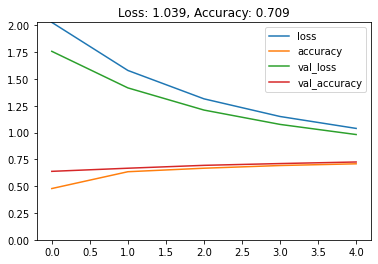

In [ ]:
plot_loss_accuracy(history)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [ ]:
#Model 7

model = build_basic_model()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=50, verbose=True, validation_split=.1)


Epoch 1/50
422/422 [==============================] - 3s 6ms/step - loss: 2.0270 - accuracy: 0.4630 - val_loss: 1.7471 - val_accuracy: 0.5935
Epoch 2/50
422/422 [==============================] - 2s 5ms/step - loss: 1.5665 - accuracy: 0.6200 - val_loss: 1.4083 - val_accuracy: 0.6705
Epoch 3/50
422/422 [==============================] - 2s 5ms/step - loss: 1.3065 - accuracy: 0.6652 - val_loss: 1.2072 - val_accuracy: 0.6872
Epoch 4/50
422/422 [==============================] - 2s 5ms/step - loss: 1.1469 - accuracy: 0.6868 - val_loss: 1.0755 - val_accuracy: 0.7165
Epoch 5/50
422/422 [==============================] - 2s 5ms/step - loss: 1.0388 - accuracy: 0.7059 - val_loss: 0.9834 - val_accuracy: 0.7242
Epoch 6/50
422/422 [==============================] - 2s 5ms/step - loss: 0.9602 - accuracy: 0.7176 - val_loss: 0.9157 - val_accuracy: 0.7275
Epoch 7/50
422/422 [==============================] - 2s 5ms/step - loss: 0.9007 - accuracy: 0.7271 - val_loss: 0.8626 - val_accuracy: 0.7410
Epoch 

<Figure size 576x432 with 0 Axes>

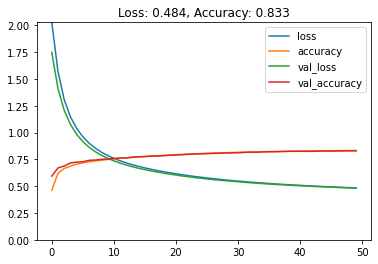

In [ ]:
plot_loss_accuracy(history)

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.511
Test accuracy: 0.819


In [ ]:
#Model 8

model = build_basic_model()
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=54000, epochs=50, verbose=True, validation_split=.1)


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 2.4748 - accuracy: 0.0957 - val_loss: 2.4564 - val_accuracy: 0.1008
Epoch 2/50
1/1 [==============================] - 0s 360ms/step - loss: 2.4693 - accuracy: 0.0954 - val_loss: 2.4511 - val_accuracy: 0.1010
Epoch 3/50
1/1 [==============================] - 0s 309ms/step - loss: 2.4638 - accuracy: 0.0951 - val_loss: 2.4459 - val_accuracy: 0.1000
Epoch 4/50
1/1 [==============================] - 0s 337ms/step - loss: 2.4584 - accuracy: 0.0950 - val_loss: 2.4409 - val_accuracy: 0.0995
Epoch 5/50
1/1 [==============================] - 0s 281ms/step - loss: 2.4532 - accuracy: 0.0948 - val_loss: 2.4359 - val_accuracy: 0.0998
Epoch 6/50
1/1 [==============================] - 0s 310ms/step - loss: 2.4480 - accuracy: 0.0946 - val_loss: 2.4310 - val_accuracy: 0.0990
Epoch 7/50
1/1 [==============================] - 0s 294ms/step - loss: 2.4430 - accuracy: 0.0946 - val_loss: 2.4262 - val_accuracy: 0.0983
Epoch 8/50
1/1 [=======

<Figure size 576x432 with 0 Axes>

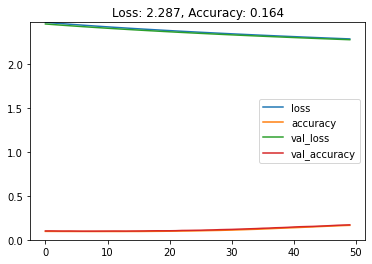

In [ ]:
plot_loss_accuracy(history)

In [ ]:
#Model 9

model = build_basic_model()
model.compile(tf.keras.optimizers.SGD(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=54000, epochs=50, verbose=True, validation_split=.1)


Epoch 1/50
1/1 [==============================] - 1s 849ms/step - loss: 2.4804 - accuracy: 0.1045 - val_loss: 2.3857 - val_accuracy: 0.1332
Epoch 2/50
1/1 [==============================] - 0s 316ms/step - loss: 2.3966 - accuracy: 0.1233 - val_loss: 2.3347 - val_accuracy: 0.1355
Epoch 3/50
1/1 [==============================] - 0s 322ms/step - loss: 2.3441 - accuracy: 0.1234 - val_loss: 2.2971 - val_accuracy: 0.1348
Epoch 4/50
1/1 [==============================] - 0s 304ms/step - loss: 2.3055 - accuracy: 0.1244 - val_loss: 2.2664 - val_accuracy: 0.1473
Epoch 5/50
1/1 [==============================] - 0s 317ms/step - loss: 2.2742 - accuracy: 0.1344 - val_loss: 2.2398 - val_accuracy: 0.1617
Epoch 6/50
1/1 [==============================] - 0s 313ms/step - loss: 2.2472 - accuracy: 0.1470 - val_loss: 2.2159 - val_accuracy: 0.1747
Epoch 7/50
1/1 [==============================] - 0s 290ms/step - loss: 2.2230 - accuracy: 0.1616 - val_loss: 2.1937 - val_accuracy: 0.2015
Epoch 8/50
1/1 [====

<Figure size 576x432 with 0 Axes>

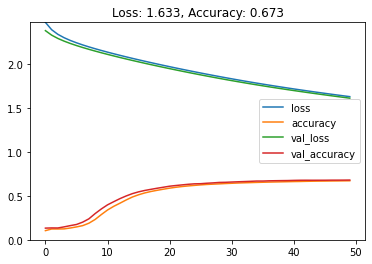

In [ ]:
plot_loss_accuracy(history)

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 1.63
Test accuracy: 0.667


In [ ]:
#Model 10

model = build_basic_model()
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=50, verbose=True, validation_split=.1)

Epoch 1/50
211/211 [==============================] - 2s 7ms/step - loss: 1.1842 - accuracy: 0.6839 - val_loss: 0.7859 - val_accuracy: 0.7780
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 0.6821 - accuracy: 0.8003 - val_loss: 0.5926 - val_accuracy: 0.8133
Epoch 3/50
211/211 [==============================] - 1s 4ms/step - loss: 0.5485 - accuracy: 0.8268 - val_loss: 0.5089 - val_accuracy: 0.8320
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4854 - accuracy: 0.8392 - val_loss: 0.4684 - val_accuracy: 0.8393
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4510 - accuracy: 0.8479 - val_loss: 0.4418 - val_accuracy: 0.8473
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4274 - accuracy: 0.8530 - val_loss: 0.4196 - val_accuracy: 0.8507
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4107 - accuracy: 0.8587 - val_loss: 0.4090 - val_accuracy: 0.8538
Epoch 

<Figure size 576x432 with 0 Axes>

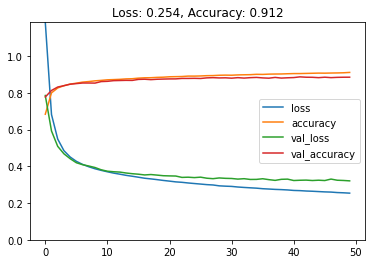

In [ ]:
plot_loss_accuracy(history)

In [ ]:
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

Test loss: 0.354
Test accuracy: 0.875


In [ ]:
#Model 11

model = build_basic_model()
model.compile(tf.keras.optimizers.Adam(lr=5), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=50, verbose=True, validation_split=.1)

Epoch 1/50
211/211 [==============================] - 1s 4ms/step - loss: 15.4289 - accuracy: 0.1704 - val_loss: 17.1296 - val_accuracy: 0.0963
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 18.3800 - accuracy: 0.1304 - val_loss: 32.3547 - val_accuracy: 0.1340
Epoch 3/50
211/211 [==============================] - 1s 4ms/step - loss: 13.9624 - accuracy: 0.1575 - val_loss: 8.1343 - val_accuracy: 0.1852
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 12.4682 - accuracy: 0.1656 - val_loss: 19.0987 - val_accuracy: 0.1033
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 11.1949 - accuracy: 0.1659 - val_loss: 14.1611 - val_accuracy: 0.1043
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 11.1242 - accuracy: 0.1682 - val_loss: 14.8766 - val_accuracy: 0.1862
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 10.1154 - accuracy: 0.1685 - val_loss: 7.1459 - val_accuracy: 0

<Figure size 576x432 with 0 Axes>

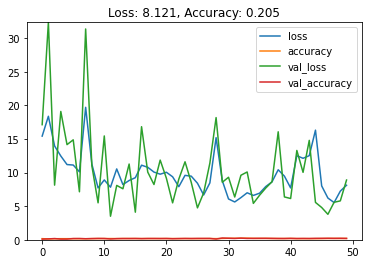

In [ ]:
plot_loss_accuracy(history)

In [ ]:
#Model 12

model = build_basic_model()
model.compile('nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, epochs=50, verbose=True, validation_split=.1)

Epoch 1/50
211/211 [==============================] - 2s 5ms/step - loss: 1.2388 - accuracy: 0.6609 - val_loss: 0.8196 - val_accuracy: 0.7752
Epoch 2/50
211/211 [==============================] - 1s 4ms/step - loss: 0.7041 - accuracy: 0.7959 - val_loss: 0.6043 - val_accuracy: 0.8122
Epoch 3/50
211/211 [==============================] - 1s 4ms/step - loss: 0.5609 - accuracy: 0.8233 - val_loss: 0.5151 - val_accuracy: 0.8313
Epoch 4/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4941 - accuracy: 0.8371 - val_loss: 0.4685 - val_accuracy: 0.8347
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.8460 - val_loss: 0.4412 - val_accuracy: 0.8443
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4303 - accuracy: 0.8527 - val_loss: 0.4240 - val_accuracy: 0.8500
Epoch 7/50
211/211 [==============================] - 1s 4ms/step - loss: 0.4121 - accuracy: 0.8581 - val_loss: 0.4107 - val_accuracy: 0.8527
Epoch 

Test loss: 0.349
Test accuracy: 0.876


<Figure size 576x432 with 0 Axes>

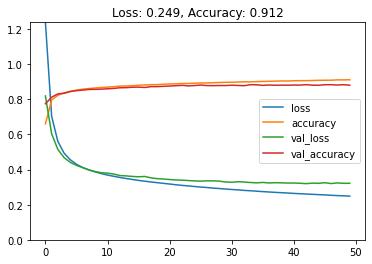

In [ ]:
plot_loss_accuracy(history)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')